Training ensemble model with CICIDS17 dataset

Link to dataset: http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/ 

Used ensemble techniques:
* Random Forest
* AdaBoost

Split: 80/20 train/test

Used libraries:
*Scikit-learn
*matplotlib


Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

import glob

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Mounted at /content/drive


In [ ]:
!pip show numpy

Name: numpy
Version: 1.21.6
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, xarray-einstats, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, scikit-image, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pycocotools, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, fo

Reading Data

Dataset consist of 8 csv files separated by days and traffic type:

* Monday - Working Hours, Normal Activity
*Tuesday - Working Hours, Normal + Attacks
*Wednesday - Working Hours, Normal + Attacks
*Thursday - Working Hours, Normal + Attacks
*Friday - Workin Hours, Normal + Attacks

In [ ]:
#path to csv
path = "/content/drive/MyDrive/деплом/csvs/MachineLearningCVE"
all_files = glob.glob(path +"/*.csv")

#concatenate all files to one
dataset = pd.concat((pd.read_csv(x) for x in all_files))

In [ ]:
#Column names 
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]


In [ ]:
dataset.columns = col_names

In [ ]:
dataset

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
dataset.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
pd.options.display.max_rows = 100

In [ ]:
dataset.dtypes

Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Backward_Packets           int64
Total_Length_of_Fwd_Packets      int64
                                ...   
Idle_Mean                      float64
Idle_Std                       float64
Idle_Max                         int64
Idle_Min                         int64
Label                           object
Length: 78, dtype: object

In [ ]:
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

In [ ]:
dataset.isnull().any().any()

True

In [ ]:
dataset = dataset.replace([np.inf, -np.inf], np.nan)
dataset = dataset.dropna()
dataset.isnull().any().any()

False

In [ ]:
dataset['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [ ]:
labels = dataset['Label'].value_counts()
list(labels.axes[0])

['BENIGN',
 'DoS Hulk',
 'PortScan',
 'DDoS',
 'DoS GoldenEye',
 'FTP-Patator',
 'SSH-Patator',
 'DoS slowloris',
 'DoS Slowhttptest',
 'Bot',
 'Web Attack � Brute Force',
 'Web Attack � XSS',
 'Infiltration',
 'Web Attack � Sql Injection',
 'Heartbleed']

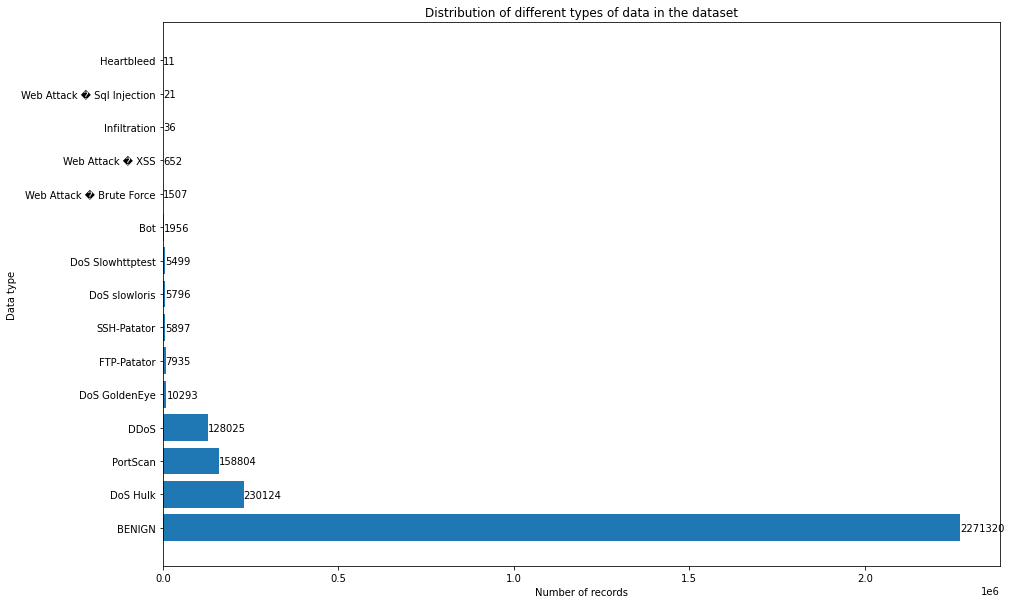

In [ ]:
plt.figure(figsize=(15,10))
types = list(dataset['Label'].value_counts().axes[0])
y_pos = np.arange(len(types))
amount = dataset['Label'].value_counts()[0:]
len(y_pos)
len(amount)
plt.barh(y_pos, amount)
plt.yticks(y_pos, types)
plt.title("Distribution of different types of data in the dataset")
plt.xlabel("Number of records")
plt.ylabel("Data type")
for i,v in enumerate(amount):
  plt.text(v+3, i-0.1, str(v))
plt.show()

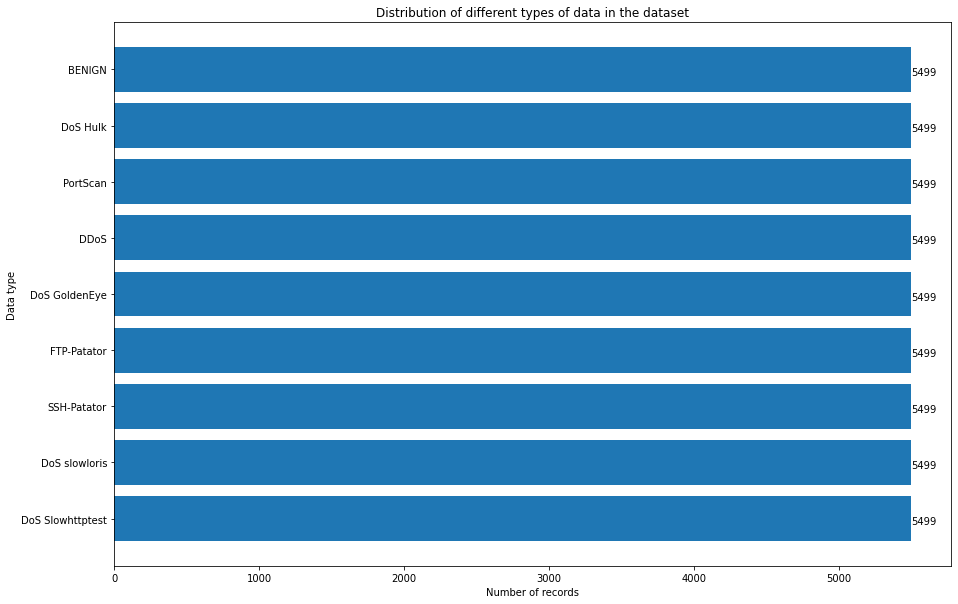

In [ ]:
plt.figure(figsize=(15,10))
types = list(norm_data['Label'].value_counts().axes[0])
y_pos = np.arange(len(types))
amount = norm_data['Label'].value_counts()[0:]
len(y_pos)
len(amount)
plt.barh(types, amount)
plt.yticks(y_pos, types)
plt.title("Distribution of different types of data in the dataset")
plt.xlabel("Number of records")
plt.ylabel("Data type")
for i,v in enumerate(amount):
  plt.text(v+3, i-0.1, str(v))
plt.show()

In [ ]:
#drop low amount records
dataset = dataset.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration', 'Web Attack � XSS', 'Web Attack � Brute Force', 'Bot'], np.nan)
dataset = dataset.dropna()
dataset['Label'].value_counts()

BENIGN              2271320
DoS Hulk             230124
PortScan             158804
DDoS                 128025
DoS GoldenEye         10293
FTP-Patator            7935
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Name: Label, dtype: int64

In [ ]:
norm_data = pd.concat([dataset[dataset['Label']=='DoS Slowhttptest'][:5499],
                       dataset[dataset['Label']=='DoS slowloris'][:5499],
                       dataset[dataset['Label']=='SSH-Patator'][:5499],
                       dataset[dataset['Label']=='FTP-Patator'][:5499],
                       dataset[dataset['Label']=='DoS GoldenEye'][:5499],
                       dataset[dataset['Label']=='DDoS'][:5499],
                       dataset[dataset['Label']=='PortScan'][:5499],
                       dataset[dataset['Label']=='DoS Hulk'][:5499],
                       dataset[dataset['Label']=='BENIGN'][:5499]
                       ])

In [ ]:
norm_data.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [ ]:
norm_data.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
69275,80,16045,5,3,356,1964,356,0,71.20,159.208040,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Slowhttptest
69276,80,109998919,4,3,525,0,520,0,131.25,259.177385,...,32,5735.0,0.0,5735,5735,110000000.0,0.0,110000000,110000000,DoS Slowhttptest
69277,80,109993343,4,3,531,0,520,0,132.75,258.218738,...,32,5437.0,0.0,5437,5437,110000000.0,0.0,110000000,110000000,DoS Slowhttptest
69278,80,109988359,4,3,535,0,520,0,133.75,257.597069,...,32,5505.0,0.0,5505,5505,110000000.0,0.0,110000000,110000000,DoS Slowhttptest
69279,80,109982960,4,3,530,0,520,0,132.50,258.376341,...,32,5303.0,0.0,5303,5303,110000000.0,0.0,110000000,110000000,DoS Slowhttptest


In [ ]:
X = norm_data.loc[:,'Destination_Port':'Idle_Min']
Y = norm_data.loc[:, 'Label']

In [ ]:
column_names = np.array(list(X))
to_drop = []
for x in column_names:
    size = X.groupby([x]).size()
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'RST_Flag_Count',
 'CWE_Flag_Count',
 'ECE_Flag_Count',
 'Fwd_Avg_Bytes_Bulk',
 'Fwd_Avg_Packets_Bulk',
 'Fwd_Avg_Bulk_Rate',
 'Bwd_Avg_Bytes_Bulk',
 'Bwd_Avg_Packets_Bulk',
 'Bwd_Avg_Bulk_Rate']

In [ ]:
X = X.drop(to_drop, axis=1)
dataset_copy = dataset.drop(to_drop, axis=1)

In [ ]:
X.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [ ]:
model_rf = RandomForestClassifier(25)
model_rf.fit(x_train, y_train)
results_rf = model_rf.score(x_test, y_test)
y_pred_rf = model_rf.predict(x_test)
print("Random Forest results", results_rf)
print("Confusion matrix for Random Forest\n", confusion_matrix(y_test, y_pred_rf))

Random Forest results 0.9982826548136176
Confusion matrix for Random Forest
 [[1119    0    0    0    0    0    0    0    0]
 [   3 1143    0    0    0    0    0    0    0]
 [   0    0 1086    0    1    0    0    0    0]
 [   0    0    0 1096    0    0    0    0    0]
 [   3    0    0    0 1109    5    0    0    0]
 [   2    0    0    0    0 1104    0    1    0]
 [   0    0    0    0    0    0 1111    0    0]
 [   2    0    0    0    0    0    0 1064    0]
 [   0    0    0    0    0    0    0    0 1050]]


In [ ]:
model_rf.feature_importances_

array([8.60884702e-02, 1.61363645e-02, 1.06349124e-02, 1.65989192e-02,
       1.86921189e-02, 1.85740382e-02, 1.94017259e-02, 1.36326508e-02,
       1.32219995e-02, 9.36389511e-03, 1.73335735e-02, 1.65297087e-02,
       2.11921221e-02, 1.88513333e-02, 1.51471093e-02, 2.43407509e-02,
       2.49499132e-02, 1.11325011e-02, 1.43536855e-02, 1.20072258e-02,
       1.09326503e-02, 3.07228360e-02, 1.02703292e-02, 1.96491143e-02,
       8.72816566e-03, 6.26006527e-03, 8.79891621e-03, 6.98439807e-03,
       5.52706003e-03, 5.81877637e-03, 4.66728518e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.98864930e-02, 7.27228708e-03,
       1.44454331e-02, 2.77994095e-02, 1.17153431e-02, 1.65314959e-02,
       1.78555854e-02, 1.68005893e-02, 1.25849468e-02, 2.82128244e-05,
       5.28091697e-03, 0.00000000e+00, 8.65495841e-03, 1.82490703e-03,
       7.94607580e-03, 0.00000000e+00, 0.00000000e+00, 8.21970385e-03,
       2.74059507e-02, 1.91208166e-02, 1.19962064e-02, 0.00000000e+00,
      

<BarContainer object of 77 artists>

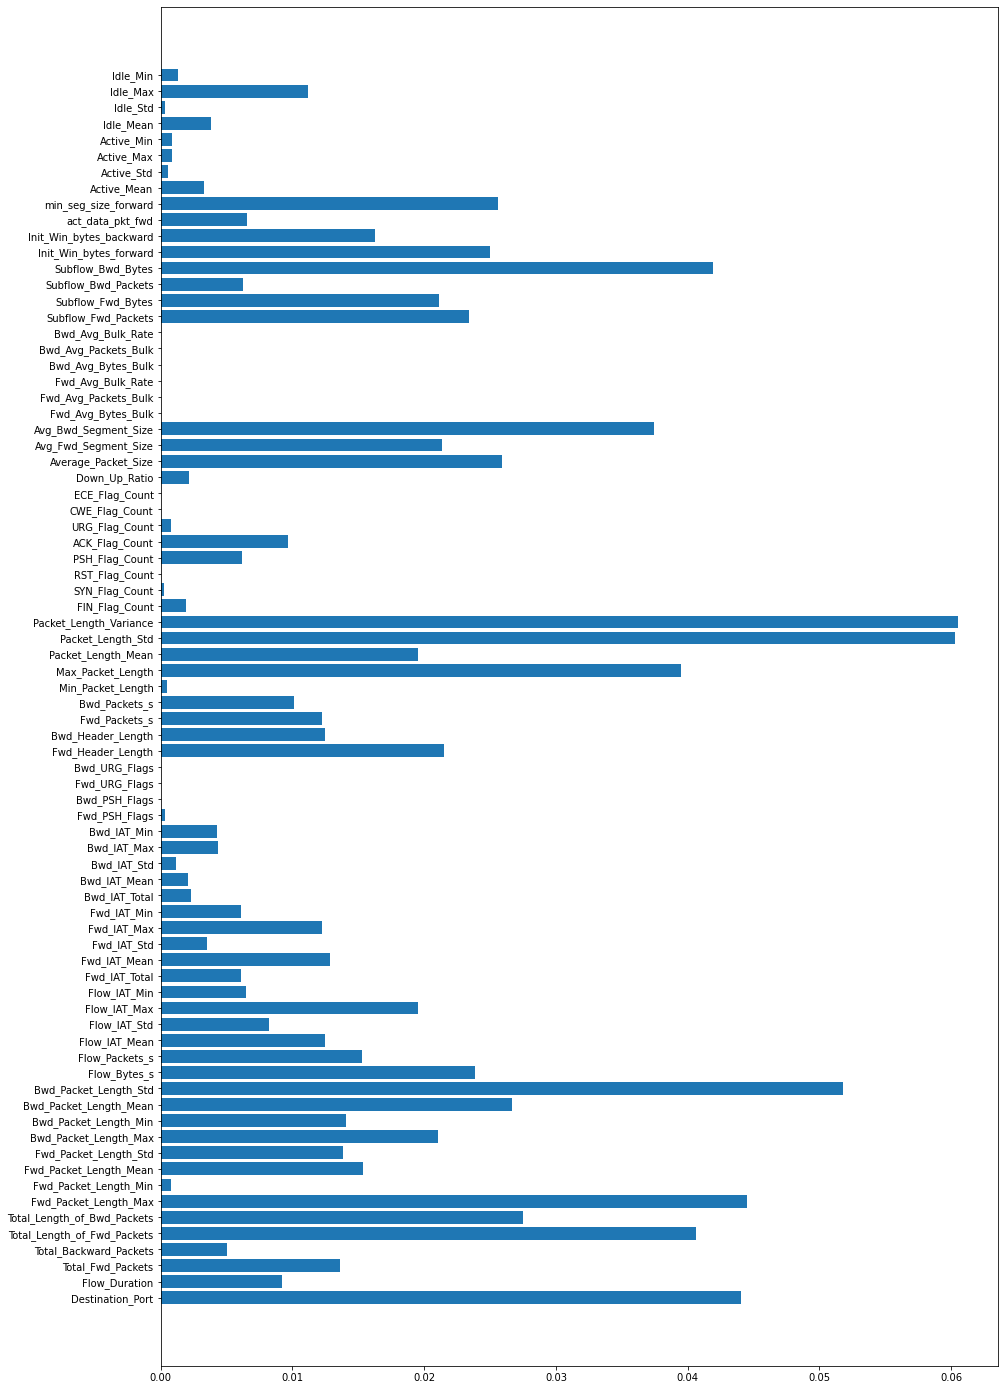

In [ ]:
plt.figure(figsize=(15,25))
plt.barh(list(dataset.columns[:-1]), model_rf.feature_importances_)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler().fit(x_train)
x_train_copy_test = min_max.transform(x_train)
x_test_copy_test = min_max.transform(x_test)
features = SelectKBest(score_func=chi2, k=x_train_copy_test.shape[1])
fit = features.fit(x_train_copy_test, y_train)
feature_importances = zip(dataset_copy.columns[:-1], features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
x_values = list(range(len(feature_importances)))
cumulative_importances = np.cumsum(sorted_importances)
value99 = cumulative_importances[-1]*0.99



Text(0.5, 1.0, 'A Chart to Show Cumulative Feature Scores')

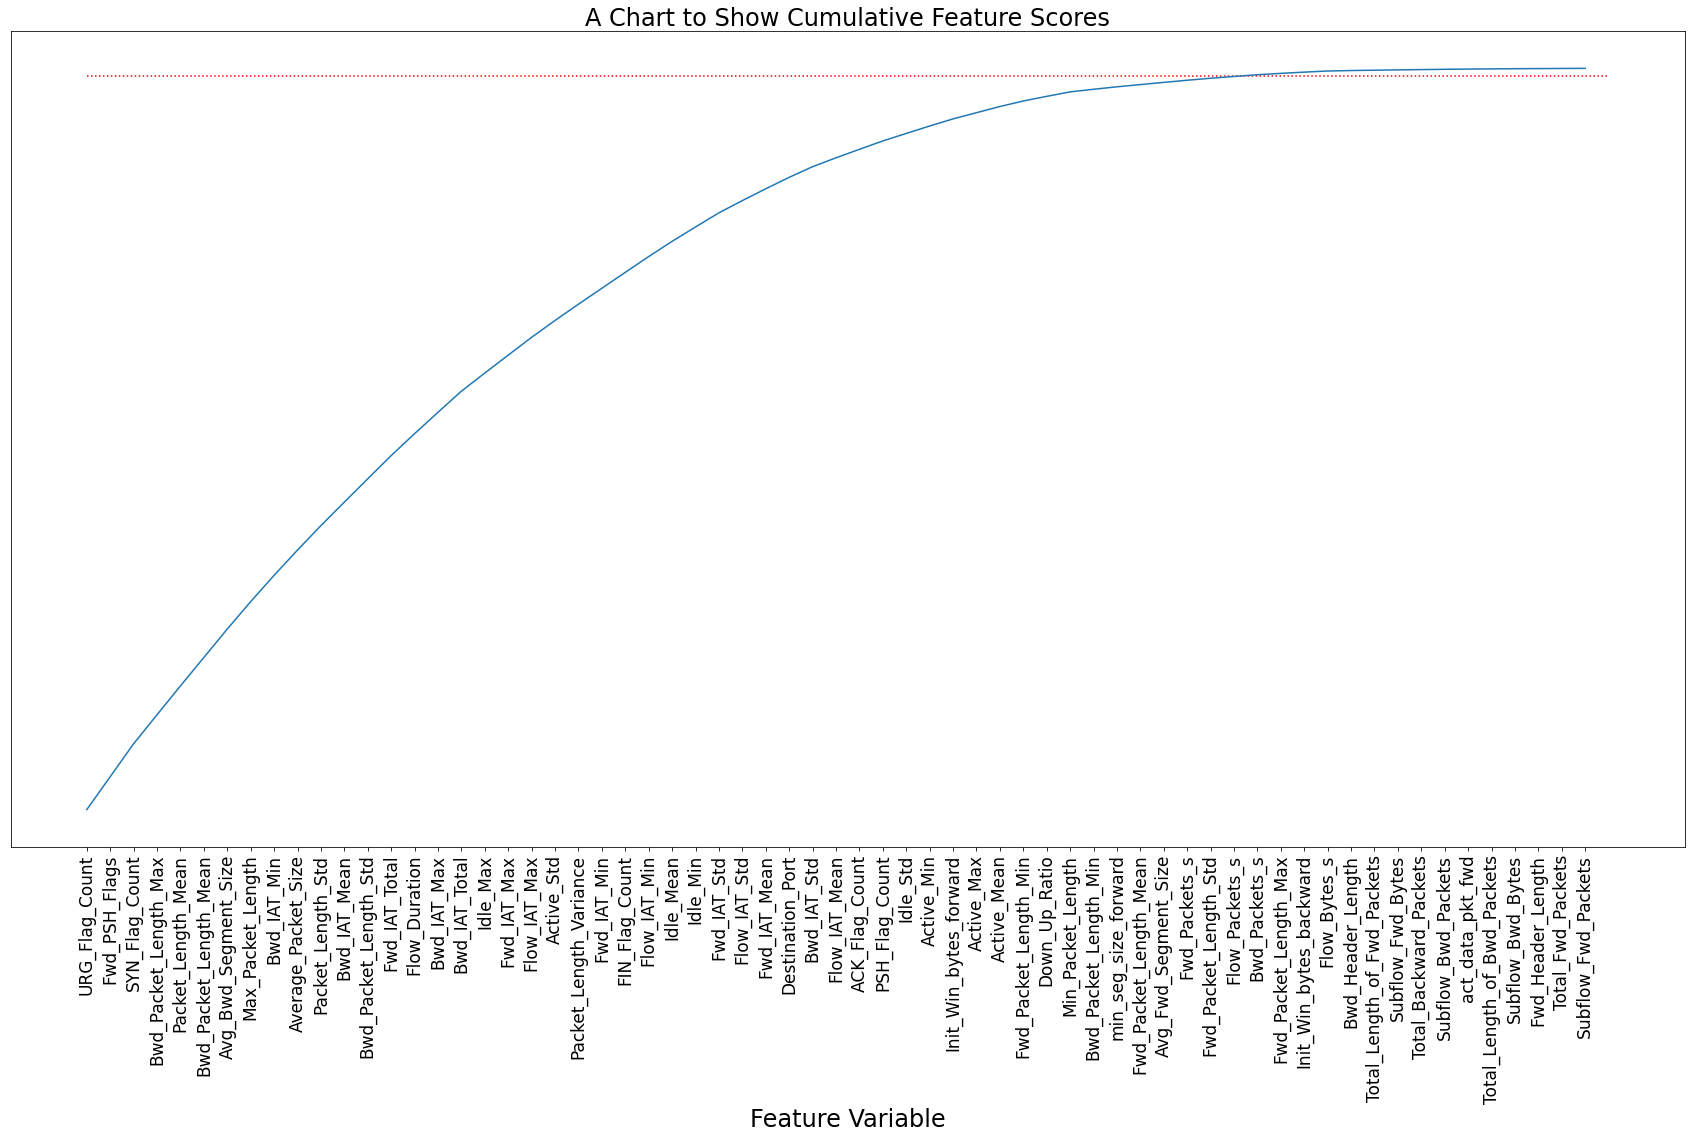

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(x_values, cumulative_importances)
plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dotted')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=17)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=24)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=24)

In [ ]:
features = SelectKBest(score_func=chi2, k=x_train_copy_test.shape[1])
fit = features.fit(x_train_copy_test, y_train)

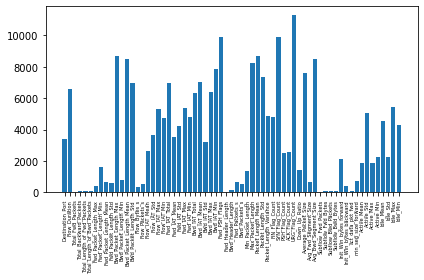

In [ ]:
# plot the score associated with each feature
plt.bar([i for i in range(len(features.scores_))], features.scores_)
plt.xticks([i for i in range(len(features.scores_))], dataset_copy.columns)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()

Text(0.5, 1.0, 'A Chart to Show Cumulative Feature Scores')

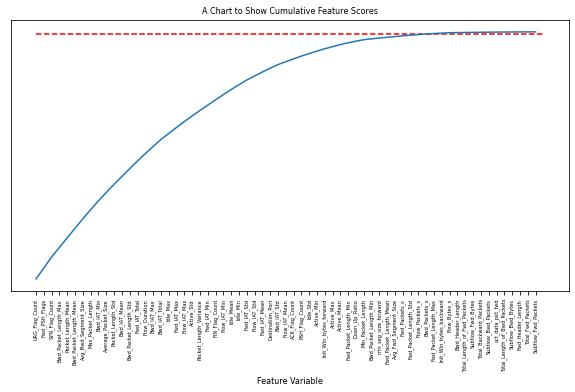

In [ ]:
# sort the features by importance score
feature_importances = zip(dataset_copy.columns[:-1], features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)

#plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.figure(figsize=(10,5))
plt.plot(x_values, cumulative_importances)
plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)


In [ ]:
new_features = dataset_copy.columns[features.get_support(indices=True)]
new_features

Index(['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Bwd_Segment_Size',
       'Init_Win_bytes_forward', 'Active_Std', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min'],
      dtype='object')

In [ ]:
new_results = model.score(x_test, y_test)

In [ ]:
y_pred_rf_new = model.predict(x_test)
print("Random Forest results", new_results)
print("Confusion matrix for Random Forest\n", confusion_matrix(y_test, y_pred_rf_new))

Random Forest results 0.9984542644117113
Confusion matrix for Random Forest
 [[1078    0    0    1    0    0    0    0    0]
 [   0 1097    0    0    1    0    0    0    0]
 [   0    0 1110    0    1    0    0    0    0]
 [   0    0    0 1092    0    0    0    0    0]
 [   1    0    1    0 1104    6    0    0    0]
 [   2    0    0    0    1 1131    0    1    0]
 [   0    0    0    0    0    0 1126    0    0]
 [   0    0    0    2    0    0    0 1098    0]
 [   0    0    0    0    0    0    0    0 2145]]


In [ ]:
from collections import OrderedDict

In [ ]:
def preproc(x_train, x_test, y_train, i):
  min_max = MinMaxScaler().fit(x_train)
  x_train_copy = min_max.transform(x_train)
  x_test_copy = min_max.transform(x_test)
  features = SelectKBest(score_func=chi2, k=i)
  
  fit = features.fit(x_train_copy, y_train)
  x_train_copy = fit.transform(x_train_copy)
  x_test_copy = fit.transform(x_test_copy)
  return x_train_copy, x_test_copy, features

In [ ]:
min_max = MinMaxScaler().fit(x_train)
x_train_copy = min_max.transform(x_train)
x_test_copy = min_max.transform(x_test)
features = SelectKBest(score_func=chi2, k=38)
fit = features.fit(x_train_copy, y_train)
x_train_copy = fit.transform(x_train_copy)
x_test_copy = fit.transform(x_test_copy)
print(dataset_copy.columns[features.get_support(indices=True)])

Index(['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Bwd_Segment_Size',
       'Init_Win_bytes_forward', 'Active_Std', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min'],
      dtype='object')


In [ ]:
model = RandomForestClassifier(n_estimators=45, random_state=42)
x_train_copy, x_test_copy, feature = preproc(x_train, x_test, y_train, 38)
#print(dataset_copy.columns[feature.get_support(indices=True)])
model.fit(x_train_copy, y_train)
y_pred_rf = model.predict(x_test_copy)
results_rf = model.score(x_test_copy, y_test)
print("Random Forest results", results_rf)
print("Confusion matrix for Random Forest\n", confusion_matrix(y_test, y_pred_rf))

Random Forest results 0.9978785735932922
Confusion matrix for Random Forest
 [[1117    1    0    0    0    0    0    0    1]
 [   2 1143    1    0    0    0    0    0    0]
 [   0    0 1086    0    1    0    0    0    0]
 [   0    0    0 1094    0    0    0    2    0]
 [   2    0    1    0 1109    5    0    0    0]
 [   2    0    0    0    1 1103    0    1    0]
 [   0    0    0    0    0    0 1111    0    0]
 [   0    0    0    1    0    0    0 1065    0]
 [   0    0    0    0    0    0    0    0 1050]]


In [ ]:
model_ab = AdaBoostClassifier(n_estimators=42, random_state=42, base_estimator=DecisionTreeClassifier(max_depth=5))
x_train_copy, x_test_copy, feature = preproc(x_train, x_test, y_train, 38)
#print(dataset_copy.columns[feature.get_support(indices=True)])
model_ab.fit(x_train_copy, y_train)
y_pred_ab = model_ab.predict(x_test_copy)
results_ab = model_ab.score(x_test_copy, y_test)
print("AdaBoost results", results_ab)
print("Confusion matrix for AdaBoost\n", confusion_matrix(y_test, y_pred_ab))

AdaBoost results 0.9980806142034548
Confusion matrix for AdaBoost
 [[1117    1    1    0    0    0    0    0    0]
 [   1 1145    0    0    0    0    0    0    0]
 [   0    0 1086    0    1    0    0    0    0]
 [   0    0    0 1096    0    0    0    0    0]
 [   0    0    1    0 1107    9    0    0    0]
 [   1    0    0    0    3 1102    0    1    0]
 [   0    0    0    0    0    0 1111    0    0]
 [   0    0    0    0    0    0    0 1066    0]
 [   0    0    0    0    0    0    0    0 1050]]


In [ ]:
need_columns = ['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Bwd_Segment_Size',
       'Init_Win_bytes_forward', 'Active_Std', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min', 'Label']

In [ ]:
has_columns = ['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Packets_s', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Bwd_Segment_Size',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Active_Mean',
       'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min']

In [ ]:
for i in has_columns:
  if i not in need_columns:
    print(i)

Fwd_Packets_s
Init_Win_bytes_forward
Init_Win_bytes_backward
Active_Mean


In [ ]:
dataset_new = dataset.loc[:,need_columns]

In [ ]:
dataset_new = dataset_new.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration', 'Web Attack � XSS', 'Web Attack � Brute Force', 'Bot'], np.nan)
dataset_new = dataset_new.dropna()
dataset_new['Label'].value_counts()

BENIGN              2271320
DoS Hulk             230124
PortScan             158804
DDoS                 128025
DoS GoldenEye         10293
FTP-Patator            7935
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Name: Label, dtype: int64

In [ ]:
norm_data = pd.concat([dataset_new[dataset_new['Label']=='DoS Slowhttptest'][:5499],
                       dataset_new[dataset_new['Label']=='DoS slowloris'][:5499],
                       dataset_new[dataset_new['Label']=='SSH-Patator'][:5499],
                       dataset_new[dataset_new['Label']=='FTP-Patator'][:5499],
                       dataset_new[dataset_new['Label']=='DoS GoldenEye'][:5499],
                       dataset_new[dataset_new['Label']=='DDoS'][:5499],
                       dataset_new[dataset_new['Label']=='PortScan'][:5499],
                       dataset_new[dataset_new['Label']=='DoS Hulk'][:5499],
                       dataset_new[dataset_new['Label']=='BENIGN'][:5499]
                       ])

In [ ]:
X_new = norm_data.loc[:,'Destination_Port':'Idle_Min']
Y_new = norm_data.loc[:, 'Label']

In [ ]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X_new,Y_new, test_size = 0.2, random_state=42)

In [ ]:
min_max_new = MinMaxScaler().fit(x_train_new)

In [ ]:
dataset_new.head()

,Destination_Port,Flow_Duration,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,...,URG_Flag_Count,Average_Packet_Size,Avg_Bwd_Segment_Size,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,54865,3,0,0.0,0.0,3.0,0.0,3,3,3,...,0,9.0,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,109,6,6.0,0.0,109.0,0.0,109,109,0,...,1,9.0,6.0,0.0,0,0,0.0,0.0,0,0
2,55055,52,6,6.0,0.0,52.0,0.0,52,52,0,...,1,9.0,6.0,0.0,0,0,0.0,0.0,0,0
3,46236,34,6,6.0,0.0,34.0,0.0,34,34,0,...,1,9.0,6.0,0.0,0,0,0.0,0.0,0,0
4,54863,3,0,0.0,0.0,3.0,0.0,3,3,3,...,0,9.0,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
import pickle
filename = "rf_model.sav"
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = "ab_model.sav"
pickle.dump(model_ab, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'scalar.sav'
pickle.dump(fit, open(filename, 'wb'))

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
0.0011820330969266601


'for label, clf_err in error_rate.items():\n    xs, ys = zip(*clf_err)\n    plt.plot(xs, ys, label=label)\nplt.xlim(min_estimators, max_estimators)\nplt.xlabel("n_estimators")\nplt.ylabel("error rate")\nplt.legend(loc="upper right")\nplt.show()'

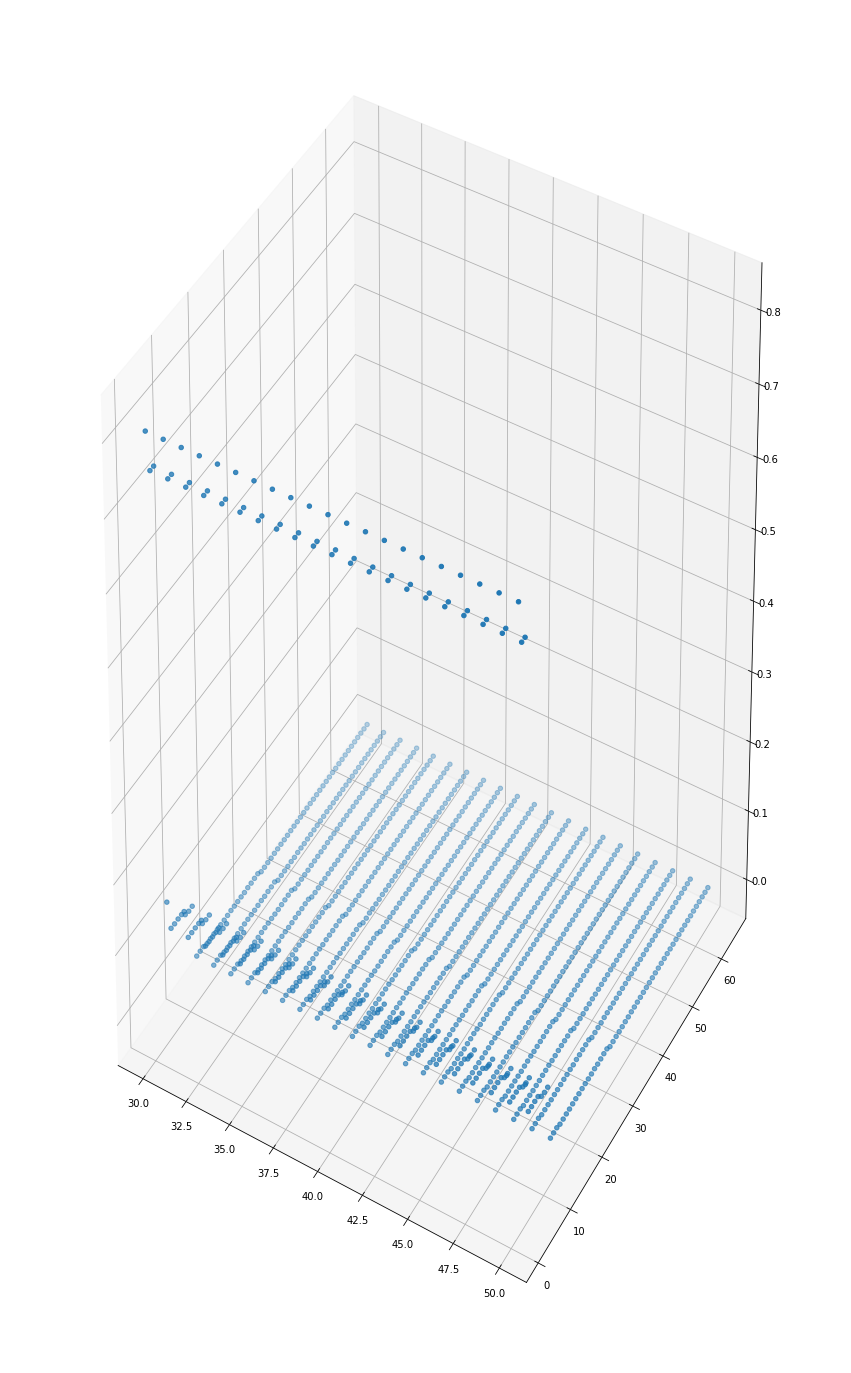

In [ ]:
ensemble_clfs = [
    ("RandomForestClassifier",
        RandomForestClassifier(warm_start=False))]
        #"""("AdaBoost",
        #AdaBoostClassifier())
    #]"""
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 30
max_estimators = 50
min_features = 1
max_features = 65
for i in range(min_estimators, max_estimators + 1):
  print(i)
  for j in range(min_features, max_features):
    model = RandomForestClassifier()
    model.set_params(n_estimators=i)
    x_train_copy, x_test_copy = preproc(x_train, x_test, y_train, j)
    model.fit(x_train_copy, y_train)
    error = 1 - model.score(x_test_copy,y_test)
    error_rate['RandomForestClassifier'].append((i, j, error))
from matplotlib.pyplot import figure
fig = plt.figure(figsize=(15,25))
ax = plt.axes(projection='3d')
for label, clf_err in error_rate.items():
  xs,ys,zs = zip(*clf_err)
print(min(zs))
ax.scatter3D(xs,ys,zs, 'gray')
"""for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.legend(loc="upper right")
plt.show()"""

In [ ]:
print(zs.index(min(zs)))

1020


In [ ]:
print(ys[1020])
print(xs[1020])

61
45


In [ ]:
new_columns = ['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Bwd_Segment_Size',
       'Init_Win_bytes_forward', 'Active_Std', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min']

In [ ]:
old_columns = ['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Bwd_Segment_Size',
       'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean', 'Idle_Std',
       'Idle_Max', 'Idle_Min']

In [ ]:
for i in new_columns:
  if i not in old_columns:
    print(i)

Init_Win_bytes_forward


Text(0, 0.5, 'error')

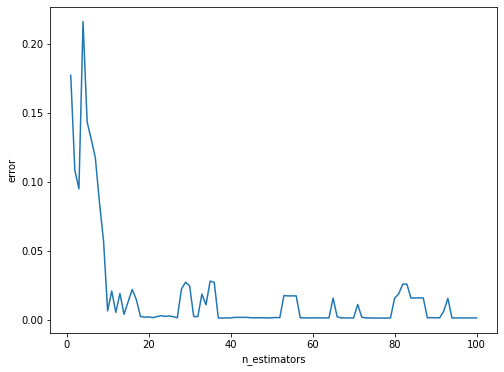

In [ ]:
#ab_testing
error_list = []
ab_min_trees = 1
ab_max_trees = 100
for i in range(ab_min_trees, ab_max_trees+1):
  model_ab_test = AdaBoostClassifier(n_estimators=i, random_state=42, base_estimator=DecisionTreeClassifier(max_depth=5))
  x_train_test, x_test_test,feat = preproc(x_train, x_test, y_train, 38)
  model_ab_test.fit(x_train_test, y_train)
  error = 1 - model_ab_test.score(x_test_test,y_test)
  error_list.append(error)
plt.figure(figsize=(8,6))
plt.plot(range(ab_min_trees, ab_max_trees+1), error_list, label='adaboost')
plt.xlabel('n_estimators')
plt.ylabel('error')


Text(0, 0.5, 'error')

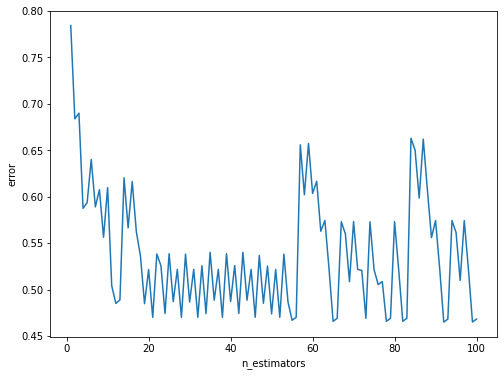

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(ab_min_trees, ab_max_trees+1), error_list, label='adaboost')
plt.xlabel('n_estimators')
plt.ylabel('error')

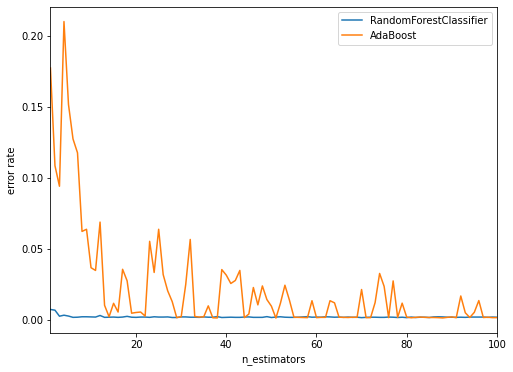

In [ ]:
ensemble_clfs = [
    ("RandomForestClassifier",
        RandomForestClassifier(warm_start=False)),
        ("AdaBoost",
        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5)))
    ]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 1
max_estimators = 100
for label, model in ensemble_clfs:
  for i in range(min_estimators, max_estimators+1):
    model.set_params(n_estimators=i)
    x_train_copy, x_test_copy, feat = preproc(x_train, x_test, y_train, 38)
    model.fit(x_train_copy, y_train)
    error = 1 - model.score(x_test_copy, y_test)
    error_rate[label].append((i, error))
plt.figure(figsize=(8,6))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.legend(loc="upper right")
plt.show()
    

In [ ]:
dataset_new.head()

,Destination_Port,Flow_Duration,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,...,Average_Packet_Size,Avg_Bwd_Segment_Size,Init_Win_bytes_forward,Active_Std,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,0,0.0,0.0,3.0,0.0,3,3,3,...,9.0,0.0,33,0.0,0,0.0,0.0,0,0,BENIGN
1,55054,109,6,6.0,0.0,109.0,0.0,109,109,0,...,9.0,6.0,29,0.0,0,0.0,0.0,0,0,BENIGN
2,55055,52,6,6.0,0.0,52.0,0.0,52,52,0,...,9.0,6.0,29,0.0,0,0.0,0.0,0,0,BENIGN
3,46236,34,6,6.0,0.0,34.0,0.0,34,34,0,...,9.0,6.0,31,0.0,0,0.0,0.0,0,0,BENIGN
4,54863,3,0,0.0,0.0,3.0,0.0,3,3,3,...,9.0,0.0,32,0.0,0,0.0,0.0,0,0,BENIGN


A/B testing

In [ ]:
variants = [1000, 2000, 3000, 4000, 5499]
#results = pd.DataFrame(columns = ['algo', 'acc', 'conf_matr'])
res = []
for i in variants:
  temp_res = ab_test(dataset_new, i)
  for j in temp_res:
    print(i)
    print('Algorithm : ', j[0])
    print('Acc : ', j[1])
    print('Confusion Matrix: ', j[2])
    print('------------------------------')

1000
Algorithm :  AB
Acc :  0.9944444444444445
Confusion Matrix:  [[200   0   0   0   0   0   1   0   0]
 [  0 207   0   0   0   0   0   0   0]
 [  0   0 203   0   0   0   0   0   0]
 [  0   0   0 204   0   0   0   0   0]
 [  1   0   0   0 194   0   0   0   0]
 [  1   0   0   0   1 207   0   2   0]
 [  1   0   0   0   0   0 189   1   0]
 [  0   0   0   0   0   2   0 207   0]
 [  0   0   0   0   0   0   0   0 179]]
------------------------------
1000
Algorithm :  RF
Acc :  0.9933333333333333
Confusion Matrix:  [[198   0   0   1   0   1   1   0   0]
 [  0 207   0   0   0   0   0   0   0]
 [  0   0 203   0   0   0   0   0   0]
 [  0   0   0 204   0   0   0   0   0]
 [  1   0   0   0 194   0   0   0   0]
 [  1   0   1   0   1 207   0   1   0]
 [  0   0   0   0   0   0 190   1   0]
 [  2   0   0   0   0   1   0 206   0]
 [  0   0   0   0   0   0   0   0 179]]
------------------------------
2000
Algorithm :  AB
Acc :  0.9966666666666667
Confusion Matrix:  [[382   0   0   0   0   1   1   0   

In [ ]:
a = ab_test(dataset_new, 'all')

In [ ]:
for i in a:
    print('Algorithm : ', i[0])
    print('Acc : ', i[1])
    print('Confusion Matrix: ', i[2])
    print('------------------------------')

In [ ]:
print(temp_res)

[['AB', 0.9984846954237802], ['RF', 0.9984846954237802]]


In [ ]:
print(res[0])

['AB', 0.08444444444444445]


In [ ]:
new_res = res[0]

In [ ]:
results = pd.DataFrame(res, columns=['algo','acc'])

In [ ]:
results

,algo,acc
0,AB,0.994444
1,RF,0.993333
2,AB,0.996667
3,RF,0.996389
4,AB,0.993519
5,RF,0.997407
6,AB,0.997083
7,RF,0.998472
8,AB,0.998081
9,RF,0.997879


In [ ]:
for i in temp_res:
  results.append(i)

TypeError: ignored

In [ ]:
results

,algo,acc
0,"[AB, 0.08444444444444445]","[RF, 0.08444444444444445]"
1,"[AB, 0.10277777777777777]","[RF, 0.10277777777777777]"
2,"[AB, 0.11296296296296296]","[RF, 0.11296296296296296]"
3,"[AB, 0.1325]","[RF, 0.1325]"
4,"[AB, 0.15092433579149409]","[RF, 0.15092433579149409]"


In [ ]:
def ab_test(dataset_copy, variant):
  if variant == "all":
    X = dataset_copy.loc[:, 'Destination_Port':'Idle_Min']
    Y = dataset_copy.loc[:, 'Label']
    
  else:
    norm_data = pd.concat([dataset_copy[dataset_copy['Label']=='DoS Slowhttptest'][:variant],
                       dataset_copy[dataset_copy['Label']=='DoS slowloris'][:variant],
                       dataset_copy[dataset_copy['Label']=='SSH-Patator'][:variant],
                       dataset_copy[dataset_copy['Label']=='FTP-Patator'][:variant],
                       dataset_copy[dataset_copy['Label']=='DoS GoldenEye'][:variant],
                       dataset_copy[dataset_copy['Label']=='DDoS'][:variant],
                       dataset_copy[dataset_copy['Label']=='PortScan'][:variant],
                       dataset_copy[dataset_copy['Label']=='DoS Hulk'][:variant],
                       dataset_copy[dataset_copy['Label']=='BENIGN'][:variant]
                       ])
    X = norm_data.loc[:, 'Destination_Port':'Idle_Min']
    Y = norm_data.loc[:, 'Label']
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  x_train, x_test, fit =  preproc(x_train, x_test, y_train, 38)
  model_rf = RandomForestClassifier(n_estimators=45, random_state=42)
  model_ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=42, random_state=42)
  model_rf.fit(x_train, y_train)
  model_ab.fit(x_train, y_train)
  score_rf = model_rf.score(x_test, y_test)
  score_ab = model_ab.score(x_test, y_test)
  confM_rf = confusion_matrix(y_test, model_rf.predict(x_test))
  confM_ab = confusion_matrix(y_test, model_ab.predict(x_test))
  return [['AB',score_ab, confM_ab], ['RF', score_rf, confM_rf]]